In [1]:
%who

Interactive namespace is empty.


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%run -i drought_2017to2019/dataInfo_and_functions.py

#### Calculating yearly sum from multiple datasets

In [4]:
! mkdir /g/data/w97/ad9701/drought_2017to2020/precip_data/sum_yearly

In [7]:
data_dir_P = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/sum_yearly/'

for d in ['mswep', 'chirps', 'agcd']:
    ds = xr.open_dataset(data_dir_P + alldata_dict[d]['mon_file'])
    vname = alldata_dict[d]['varname']
    
    da_byyear = ds[vname].groupby('time.year').sum()
    da_byyear.to_netcdf(out_dir + d + '_yearly_precip.nc')

#### Calculating the percentiles of yearly sum

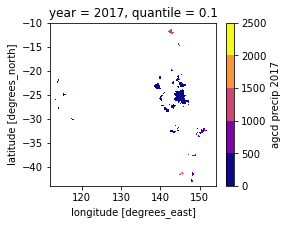

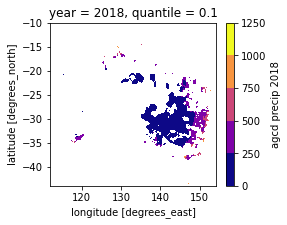

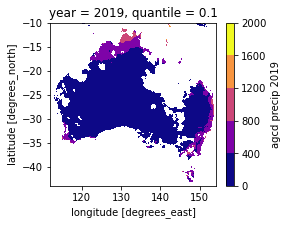

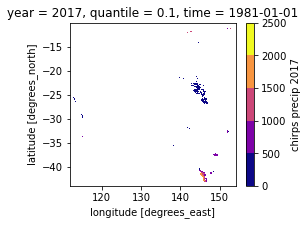

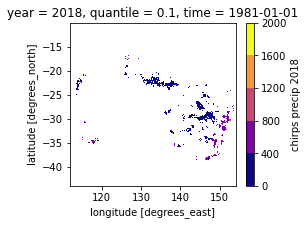

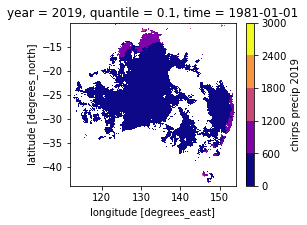

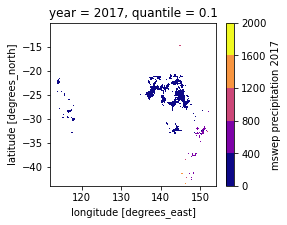

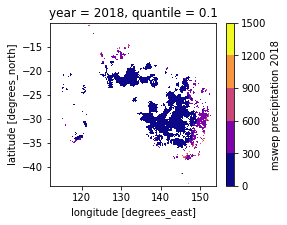

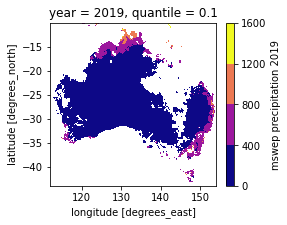

In [9]:
perc = 10

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_yearly'
fig_dir = 'figures/drought_2017to2020/precip/below_' + str(perc) + 'th_perc_yearly/'
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile_yearly/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_yearly/'

time_slice = slice('2017-01-01', '2020-12-31')
year_slice = slice(2017, 2019)

cmap = 'plasma' #"YlGnBu"

levels = 6 #[0, 10, 20, 30, 40, 50]

for d in ['agcd', 'chirps', 'mswep']: #'agcd'
    ds = xr.open_dataset(data_dir + 'sum_yearly/' + d + '_yearly_precip.nc')
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(year = year_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_below_thresh = da.where(da <= ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + d + '_yearly_precip_lt_' + str(perc) + 'th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019]: #, 2020]:
        da_yr = da_below_thresh.sel(year = year).load()
        da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size

        da_yr.rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_' + d + '.png')
        del da_yr

#### Calculating yearly mean

In [6]:
! mkdir /g/data/w97/ad9701/drought_2017to2020/sm_data/mean_yearly

In [7]:
input_dir = '/g/data/w97/ad9701/drought_2017to2020/sm_data/'
out_dir = '/g/data/w97/ad9701/drought_2017to2020/sm_data/mean_yearly/'

for d in ['esacci']:
    ds = xr.open_dataset(input_dir + alldata_dict[d]['mon_file'])
    vname = alldata_dict[d]['varname']
    
    da_byyear = ds[vname].groupby('time.year').mean()
    da_byyear.to_netcdf(out_dir + d + '_yearly.nc')

#### Calculating the percentiles of yearly mean

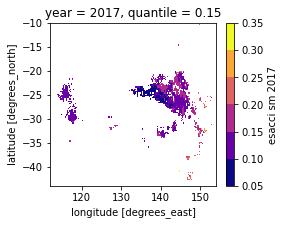

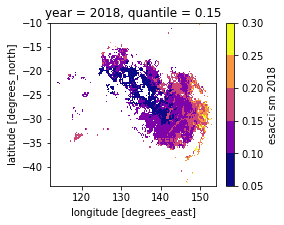

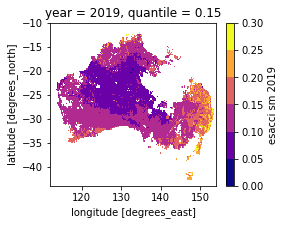

In [11]:
perc = 15

data_dir = '/g/data/w97/ad9701/drought_2017to2020/sm_data/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_yearly'
fig_dir = 'figures/drought_2017to2020/sm/below_' + str(perc) + 'th_perc_yearly/'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir) 
figname_prefix = 'below' + str(perc) + 'p'

thresh_dir = data_dir + str(perc) + 'th_percentile_yearly/'
out_dir = data_dir + 'drght_' + str(perc) + 'th_perc_baseline_198101_202005_yearly/'

year_slice = slice(2017, 2019)

cmap = 'plasma' #"YlGnBu"

levels = 6 #[0, 10, 20, 30, 40, 50]

for d in ['esacci']: #'agcd'
    ds = xr.open_dataset(data_dir + 'mean_yearly/' + d + '_yearly.nc')
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if (data_type == 'precip') | (data_type == 'sm'):
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(year = year_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_' + str(perc) + 'th_perc_threshold.nc')
    da_below_thresh = da.where(da <= ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + d + '_yearly_lt_' + str(perc) + 'th_perc.nc')
    
    # ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    # da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019]: #, 2020]:
        da_yr = da_below_thresh.sel(year = year).load()
        # da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size

        da_yr.rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_' + d + '.png')
        del da_yr